In [13]:
# Dependencies
import random
import json
from pprint import pprint
import requests
from citipy import citipy
from config import api_key
import pandas as pd
import matplotlib.pyplot as plt

# Generate Cities List

In [14]:
# Function to generate 1000 random coordinates
def randCoord():
    for x in range(1000):
        coordinates.append((random.randint(-90, 91), random.randint(-180, 181)))

# randCoord()
# print(coordinates)

In [15]:
# Function to find unique cities based on generated coordinates
def findCity():
    for coordinate_pair in coordinates:
        lat, lon = coordinate_pair
        city_obj = citipy.nearest_city(lat, lon)
        city = city_obj.city_name
        
        # Want unique cities only
        if city not in cities:
            cities.append(city)

# findCity()
# print(cities)
# print(f"Unique cities found based on lat/lon out of {coordinate_count} coordinate pairs: {len(cities)}")

# Perform API Calls

In [16]:
# Ask how many cities to analyze
how_many_cities = input("How many cities do you want to analyze? ")

How many cities do you want to analyze? 500


In [17]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [18]:
# Hold generated coordinates and unique cities
coordinates = []
cities = []

# Set up lists to hold reponse information
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Make counters
counter = 0
randCoord_count = 0

while len(name) < int(how_many_cities):
    
    # Generate coordinate pairs
    randCoord()
    randCoord_count += 1
    
    # Look up nearby unique nearby cities
    findCity()
    
    # Loop through the list of cities and perform a request for data on each
    # Need to start at where it ended
    for city in cities[counter:]:
        # Increment counter
        counter += 1
        print(f"Processing Record {counter} | {city}")
        
        # Replace spaces in cities names of more than one word
        city_name = city.replace(" ", "+")
        
        # Print each query
        full_query_url = query_url + city_name
        print(full_query_url)
        
        # Retrieve data as json
        response = requests.get(full_query_url).json()
        
        # Append data to lists
        try:
            citi = response['name']
            if len(name) == int(how_many_cities):
                break            
            elif citi not in name:
                name.append(response['name'])
                cloudiness.append(response['clouds']['all'])
                country.append(response['sys']['country'])
                date.append(response['dt'])
                humidity.append(response['main']['humidity'])
                lat.append(response['coord']['lat'])
                lon.append(response['coord']['lon'])
                max_temp.append(response['main']['temp_max'])
                wind_speed.append(response['wind']['speed'])
        except KeyError:
            print(f"*City Not Found ({city})")
        except:
            raise

Processing Record 1 | lukulu
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lukulu
Processing Record 2 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=aklavik
Processing Record 3 | albany
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=albany
Processing Record 4 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hilo
Processing Record 5 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lebu
Processing Record 6 | george town
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=george+town
Processing Record 7 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=cape+town
Processing Record

Processing Record 57 | churapcha
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=churapcha
Processing Record 58 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=khatanga
Processing Record 59 | seoul
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=seoul
Processing Record 60 | kysyl-syr
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kysyl-syr
Processing Record 61 | castro
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=castro
Processing Record 62 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lasa
Processing Record 63 | tuggurt
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tuggurt
*City No

*City Not Found (illoqqortoormiut)
Processing Record 112 | taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=taolanaro
*City Not Found (taolanaro)
Processing Record 113 | phalaborwa
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=phalaborwa
Processing Record 114 | bairiki
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=bairiki
*City Not Found (bairiki)
Processing Record 115 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tasiilaq
Processing Record 116 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=norman+wells
Processing Record 117 | dembi dolo
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=dembi+dolo
Processing Record 118 | a

*City Not Found (belushya guba)
Processing Record 167 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=arraial+do+cabo
Processing Record 168 | maldonado
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=maldonado
Processing Record 169 | khirkiya
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=khirkiya
Processing Record 170 | rovereto
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=rovereto
Processing Record 171 | carupano
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=carupano
Processing Record 172 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=qaanaaq
Processing Record 173 | brae
http://api.openweathermap.org/data/2.5/weather?appid=b9

Processing Record 221 | lata
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lata
Processing Record 222 | ginir
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=ginir
Processing Record 223 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=port+hardy
Processing Record 224 | istanbul
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=istanbul
Processing Record 225 | roald
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=roald
Processing Record 226 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=paamiut
Processing Record 227 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hovd
Processing 

*City Not Found (meyungs)
Processing Record 278 | oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=oktyabrskiy
Processing Record 279 | valparaiso
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=valparaiso
Processing Record 280 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=puerto+escondido
Processing Record 281 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=constitucion
Processing Record 282 | stykkisholmur
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=stykkisholmur
Processing Record 283 | presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=presidencia+roque+saenz+pena
Processing Record 28

Processing Record 334 | ambon
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=ambon
Processing Record 335 | camopi
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=camopi
Processing Record 336 | yenotayevka
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=yenotayevka
Processing Record 337 | emerald
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=emerald
Processing Record 338 | samarai
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=samarai
Processing Record 339 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=victoria
Processing Record 340 | high rock
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=h

Processing Record 390 | jahrom
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=jahrom
*City Not Found (jahrom)
Processing Record 391 | benguela
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=benguela
Processing Record 392 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=bathsheba
Processing Record 393 | panuco
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=panuco
Processing Record 394 | mandera
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=mandera
Processing Record 395 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lolua
*City Not Found (lolua)
Processing Record 396 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=b9d79393

Processing Record 445 | akhisar
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=akhisar
Processing Record 446 | tshane
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tshane
Processing Record 447 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=itarema
Processing Record 448 | barawe
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=barawe
*City Not Found (barawe)
Processing Record 449 | ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=ketchikan
Processing Record 450 | manono
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=manono
Processing Record 451 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95

Processing Record 500 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=sinnamary
Processing Record 501 | namalenga
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=namalenga
Processing Record 502 | khuzhir
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=khuzhir
Processing Record 503 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=saint-philippe
Processing Record 504 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=cherskiy
Processing Record 505 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=clyde+river
Processing Record 506 | korla
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d

Processing Record 556 | trelew
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=trelew
Processing Record 557 | kholodnyy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kholodnyy
Processing Record 558 | sokode
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=sokode
Processing Record 559 | amethi
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=amethi
Processing Record 560 | el alto
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=el+alto
Processing Record 561 | rudbar
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=rudbar
*City Not Found (rudbar)
Processing Record 562 | northam
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&uni

In [19]:
# print(name)
print(f"Unique cities found after {randCoord_count} random coordinate generation(s): {len(cities)}")
print(f"Number of cities successfully queried out of {counter - 1}: {len(name)}")

Unique cities found after 2 random coordinate generation(s): 730
Number of cities successfully queried out of 563: 500


In [20]:
cities_data_df = pd.DataFrame({'City': name, 
                               'Cloudiness': cloudiness, 
                               'Country': country, 
                               'Date': date, 
                               'Humidity': humidity, 
                               'Lat': lat, 
                               'Lon': lon, 
                               'Max Temp': max_temp, 
                               'Wind Speed': wind_speed})

cities_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Lukulu,32,ZM,1520311762,74,-14.38,23.24,69.22,4.94
1,Aklavik,75,CA,1520308800,61,68.22,-135.01,14.00,8.05
2,Albany,75,US,1520308440,69,42.65,-73.75,33.80,5.82
3,Hilo,90,US,1520308860,69,19.71,-155.08,73.40,10.29
4,Lebu,80,ET,1520311764,80,8.96,38.73,57.52,4.16
5,George Town,75,MY,1520310600,70,5.42,100.33,87.80,4.70
6,Cape Town,0,ZA,1520308800,88,-33.93,18.42,62.60,13.87
7,Langley Park,1,US,1520309700,74,38.99,-76.98,41.00,4.50
8,Prince Rupert,90,CA,1520308800,69,54.32,-130.32,33.80,5.82
9,Kodiak,1,US,1520308380,59,39.95,-94.76,35.60,8.05


# Latitude vs. Temperature Plot

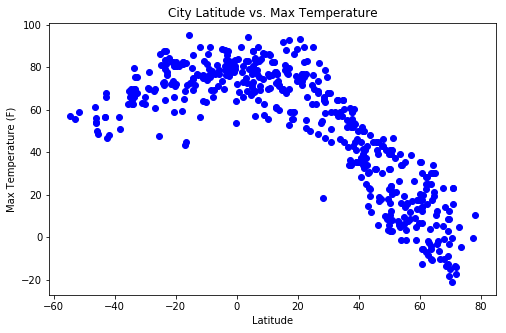

In [21]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Max Temp'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Latitude vs. Temperature Plot
plt.savefig('images/LatVsTemp.png')
plt.show()

# Latitude vs. Humidity Plot

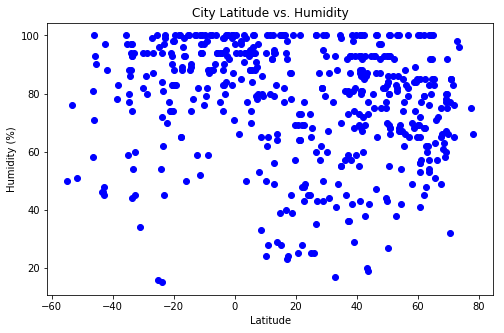

In [22]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Humidity'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Latitude vs. Humidity Plot
plt.savefig('images/LatVsHumidity.png')
plt.show()

# Latitude vs. Cloudiness Plot

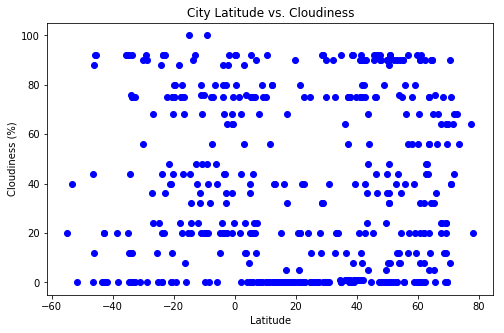

In [23]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Cloudiness'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Latitude vs. Cloudiness Plot
plt.savefig('images/LatVsCloudiness.png')
plt.show()

# Latitude vs. Wind Speed Plot

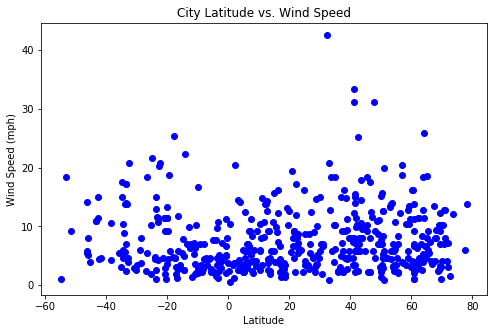

In [24]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Wind Speed'], marker='o', color='b')

# Label title and axes
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Latitude vs. Wind Speed Plot
plt.savefig('images/LatVsWindSpd.png')
plt.show()